### 1. Start a ChatBot session to understand what a Classification Decision Tree is: (a) ask the ChatBot to describe the type of problem a Classification Decision Tree addresses and provide some examples of real-world applications where this might be particularly useful, and then (b) make sure you understand the difference between how a Classification Decision Tree makes (classification) predictions versus how Multiple Linear Regression makes (regression) predictions

##### GPT: https://chatgpt.com/share/673a664a-9994-8008-a326-e424ccc9d719

a) It categorizes data into based on a given input. Real world applications include medical diagnosis, fraud detection, spam detection, and image recognition.

b)
- Classification Decision Trees:
    - Predicts discrete categories
    - Segments the input by creating decision nodes and branches
    - These nodes will have different conditions which lead to making a final decision
    - Basically a bunch of interactions
- Multiple Linear Rgression: 
    - Predicts a continuous numerical value
    - Uses a mathematical model to predict numerical output
    - Calculates weighted sums

### 2. Continue your ChatBot session and explore with your ChatBot what real-world application scenario(s) might be most appropriately addressed by each of the following metrics below: provide your answers and, in your own words, concisely explain your rationale for your answers.

1. Accuracy: Email Spam Filtering
    - Gives us a sense of how good the model is at detecting spam
    - It tells us how many spam and non-spam emails were both identified correctly
2. Sensitivity: Cancer Detection
    - Important since we DO NOT want to fail to identify a disease (this could be particularily bad)
    - A high sensitivity will let us know that actual cancer is detected most of the time which lowers the chance of failing to diagnose a patient
3. Specificity: Fraud Detection in Credit Card Transactions
    - We want to minimize the number of actual credit card transactions that we detect as fraud
    - High specificity makes it so that we avoid detecting legit transactions as false.
4. Precision: Movie Reccommendations
    - We want precision when reccommending movies
    - High precision means we are reccommending movies that the user actually likes
    - This lets us know how often we are correct in identifying movies that the user likes

### 3. Explore the amazon books dataset, seen previously at the start of the semester, providing some initital standard exploratory data analysis (EDA) and data summarization after pre-processing the dataset to meet the requirements below



In [69]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

ab

,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Height,Width,Thick,Weight_oz
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010.0,1605506249,7.8,5.5,0.8,11.2
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008.0,1416564195,8.4,5.5,0.7,7.2
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995.0,486285537,8.3,5.2,0.3,4.0
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008.0,61564893,8.8,6.0,1.6,28.8
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011.0,307265722,8.0,5.2,1.4,22.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Where the Sidewalk Ends,Shel Silverstein,18.99,12.24,H,192.0,HarperCollins,2004.0,60572345,9.3,6.6,1.1,24.0
321,White Privilege,Paula S. Rothenberg,27.55,27.55,P,160.0,Worth Publishers,2011.0,1429233443,9.1,6.1,0.7,8.0
322,Why I wore lipstick,Geralyn Lucas,12.95,5.18,P,224.0,St Martin's Griffin,2005.0,031233446X,8.0,5.4,0.7,6.4
323,"Worlds Together, Worlds Apart: A History of th...",Robert Tignor,97.50,97.50,P,480.0,W. W. Norton & Company,2010.0,393934942,10.7,8.9,0.9,14.4


In [70]:
# Cleaning Data
abV1 = ab.drop(['Weight_oz', 'Width', 'Height'], axis=1).copy()
abV2 = abV1.dropna()
abV2

,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Thick
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010.0,1605506249,0.8
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008.0,1416564195,0.7
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995.0,486285537,0.3
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008.0,61564893,1.6
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011.0,307265722,1.4
...,...,...,...,...,...,...,...,...,...,...
320,Where the Sidewalk Ends,Shel Silverstein,18.99,12.24,H,192.0,HarperCollins,2004.0,60572345,1.1
321,White Privilege,Paula S. Rothenberg,27.55,27.55,P,160.0,Worth Publishers,2011.0,1429233443,0.7
322,Why I wore lipstick,Geralyn Lucas,12.95,5.18,P,224.0,St Martin's Griffin,2005.0,031233446X,0.7
323,"Worlds Together, Worlds Apart: A History of th...",Robert Tignor,97.50,97.50,P,480.0,W. W. Norton & Company,2010.0,393934942,0.9


In [71]:
# Use .loc to ensure you're modifying the original DataFrame
abV2['Pub year'] = abV2['Pub year'].astype('int64')
abV2['NumPages'] = abV2['NumPages'].astype('int64')
abV2['Hard_or_Paper'] = abV2['Hard_or_Paper'].astype('category')

abV2

/tmp/ipykernel_130/1429965839.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abV2['Pub year'] = abV2['Pub year'].astype('int64')
/tmp/ipykernel_130/1429965839.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abV2['NumPages'] = abV2['NumPages'].astype('int64')
/tmp/ipykernel_130/1429965839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Thick
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304,Adams Media,2010,1605506249,0.8
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273,Free Press,2008,1416564195,0.7
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96,Dover Publications,1995,486285537,0.3
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672,Harper Perennial,2008,61564893,1.6
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720,Knopf,2011,307265722,1.4
...,...,...,...,...,...,...,...,...,...,...
320,Where the Sidewalk Ends,Shel Silverstein,18.99,12.24,H,192,HarperCollins,2004,60572345,1.1
321,White Privilege,Paula S. Rothenberg,27.55,27.55,P,160,Worth Publishers,2011,1429233443,0.7
322,Why I wore lipstick,Geralyn Lucas,12.95,5.18,P,224,St Martin's Griffin,2005,031233446X,0.7
323,"Worlds Together, Worlds Apart: A History of th...",Robert Tignor,97.50,97.50,P,480,W. W. Norton & Company,2010,393934942,0.9


### 4. Create an 80/20 split with 80% of the data as a training set ab_reduced_noNaN_train and 20% of the data testing set ab_reduced_noNaN_test using either df.sample(...) as done in TUT or using train_test_split(...) as done in the previous HW, and report on how many observations there are in the training data set and the test data set.
- There are 255 observations in the training data set
- THere are 64 observations in the testing data set

### Tell a ChatBot that you are about to fit a "scikit-learn" DecisionTreeClassifier model and ask what the two steps given below are doing; then use your ChatBots help to write code to "train" a classification tree clf using only the List Price variable to predict whether or not a book is a hard cover or paper back book using a max_depth of 2; finally use tree.plot_tree(clf) to explain what predictions are made based on List Price for the fitted clf model

##### GPT: https://chatgpt.com/share/673a927c-a200-8008-92a4-a8b468cfe0fc

In [72]:
np.random.seed(130)
ab_reduced_noNaN_train = abV2.sample(frac=0.8, replace=False).index.sort_values()
ab_reduced_noNaN_test = abV2.index[~abV2.index.isin(ab_reduced_noNaN_train)]

In [73]:
ab_reduced_noNaN_train.shape

(255,)

In [74]:
ab_reduced_noNaN_test.shape

(64,)

In [75]:
from sklearn.tree import DecisionTreeClassifier

train_data = abV2.loc[ab_reduced_noNaN_train]
test_data = abV2.loc[ab_reduced_noNaN_test]

y_train = pd.get_dummies(train_data['Hard_or_Paper'])['H']
X_train = train_data[['List Price']]

y_test = pd.get_dummies(test_data['Hard_or_Paper'])['H']
X_test = test_data[['List Price']]

clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

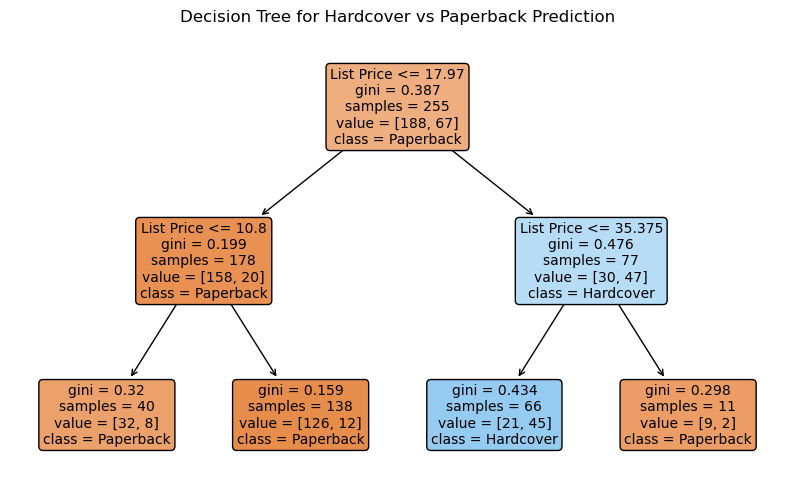

In [76]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(10, 6))
plot_tree(
    clf,
    feature_names=['List Price'],   # Name of the feature(s)
    class_names=['Paperback', 'Hardcover'],  # Names of the classes
    filled=True,  # Fill nodes with colors for better visualization
    rounded=True, # Rounded corners for a clean look
    fontsize=10   # Font size for labels
)
plt.title("Decision Tree for Hardcover vs Paperback Prediction")
plt.show()

## 5. Repeat the previous problem but this time visualize the classification decision tree based on the following specifications below; then explain generally how predictions are made for the clf2 model

- Training: decision tree classifier compares relationship the outcome variables and the features NumPages, Thick and List Price.
- For each new data point in test_data, the classifier checks the condition of each node and proceeds to the next one if it satisfies it. In this case, the tree goes up to four levels which means there are more conditions that are checked for each new data point in order to classify it. Using that, when it hits the end (leaf node) it will make a decision of either hardcover or paperback.

In [77]:
from sklearn.tree import DecisionTreeClassifier

train_data = abV2.loc[ab_reduced_noNaN_train]
test_data = abV2.loc[ab_reduced_noNaN_test]

y_train1 = pd.get_dummies(train_data['Hard_or_Paper'])['H']
X_train1 = train_data[['NumPages', 'Thick', 'List Price']]

y_test1 = pd.get_dummies(test_data['Hard_or_Paper'])['H']
X_test1 = test_data[['NumPages', 'Thick', 'List Price']]

clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train1, y_train1)

y_pred2 = clf2.predict(X_test1)

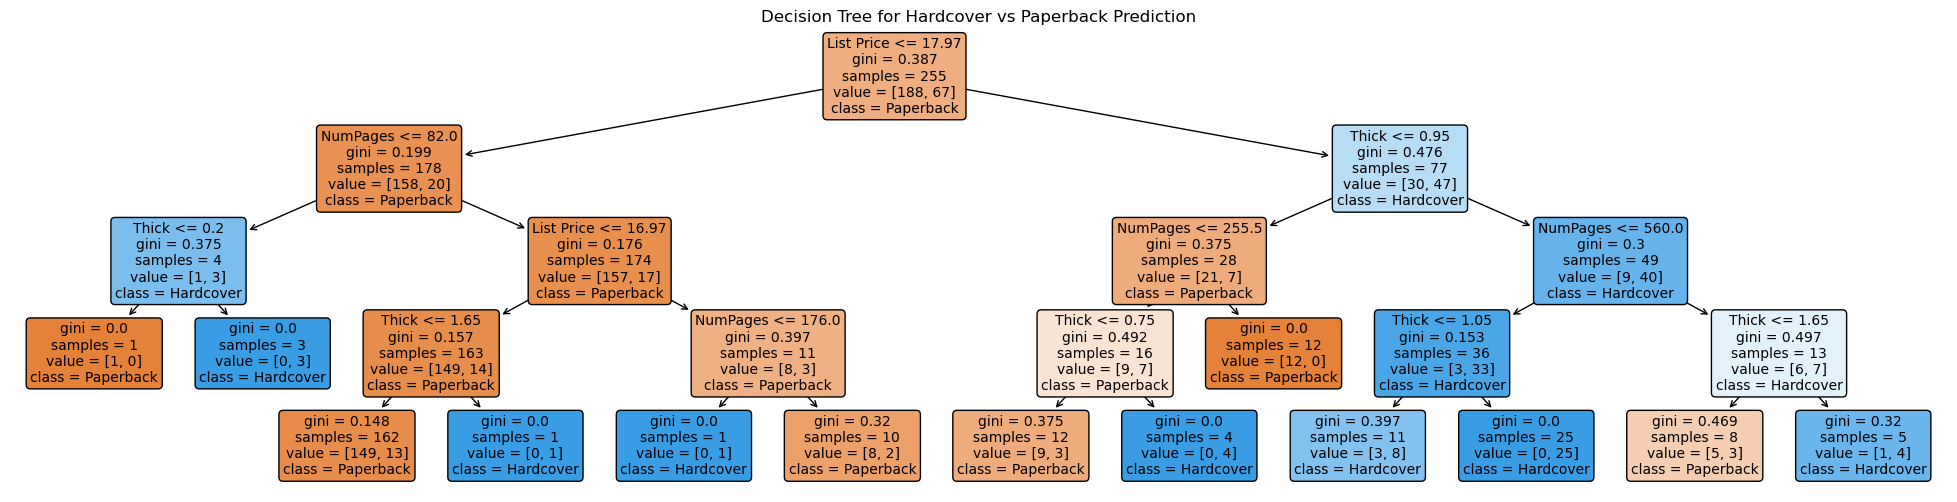

In [78]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(25, 6))
plot_tree(
    clf2,
    feature_names=['NumPages', 'Thick', 'List Price'],   # Name of the feature(s)
    class_names=['Paperback', 'Hardcover'],  # Names of the classes
    filled=True,  # Fill nodes with colors for better visualization
    rounded=True, # Rounded corners for a clean look
    fontsize=10   # Font size for labels
)
plt.title("Decision Tree for Hardcover vs Paperback Prediction")
plt.show()

## 6. Use previously created ab_reduced_noNaN_test to create confusion matrices for clf and clf2. Report the sensitivity, specificity and accuracy for each of the models
##### No gpt needed

FOR clf:
- In sample (training) sensitivity: 0.672
- Out of sample (testing) sensitivity: 0.737
- In sample (training) specificity: 0.888
- Out of sample (testing) specificity: 0.933
- In sample (training) accuracy: 0.831
- Out of sample (testing) accuracy: 0.875

FOR clf2:
- In sample (training) sensitivity: 0.687
- Out of sample (testing) sensitivity: 0.789
- In sample (training) specificity: 0.979
- Out of sample (testing) specificity: 0.978
- In sample (training) accuracy: 0.902
- Out of sample (testing) accuracy: 0.922

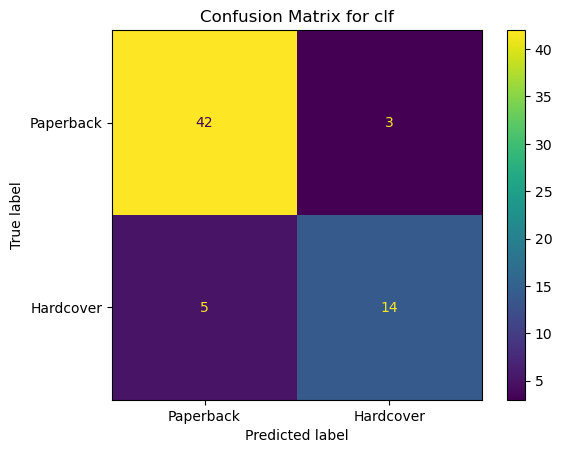

In [88]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_disp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred, 
    labels=[False, True]), display_labels=['Paperback', 'Hardcover'])
_ = cm_disp.plot()
plt.title("Confusion Matrix for clf")
plt.show()

In [91]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
# in sklearn specificity is recall_score(y_true, y_pred, pos_label=0)
# while sensitivity recall_score(y_true, y_pred, pos_label=1) is the default 

# Sensitivity
sensitivity_test = recall_score(y_test, y_pred, pos_label=1)  # For 'Hardcover' class (1)
sensitivity_train = recall_score(y_train, clf.predict(X_train), pos_label=1)

# Specificity
specificity_test = recall_score(y_test, y_pred, pos_label=0)  # For 'Paperback' class (0)
specificity_train = recall_score(y_train, clf.predict(X_train), pos_label=0)

# Accuracy
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, clf.predict(X_train))

print("FOR clf:")
print("In sample (training) sensitivity:", np.round(sensitivity_train, 3))
print("Out of sample (testing) sensitivity:", np.round(sensitivity_test, 3))
print("In sample (training) specificity:", np.round(specificity_train, 3))
print("Out of sample (testing) specificity:", np.round(specificity_test, 3))
print("In sample (training) accuracy:", np.round(accuracy_train, 3))
print("Out of sample (testing) accuracy:", np.round(accuracy_test, 3))

FOR clf:
In sample (training) sensitivity: 0.672
Out of sample (testing) sensitivity: 0.737
In sample (training) specificity: 0.888
Out of sample (testing) specificity: 0.933
In sample (training) accuracy: 0.831
Out of sample (testing) accuracy: 0.875


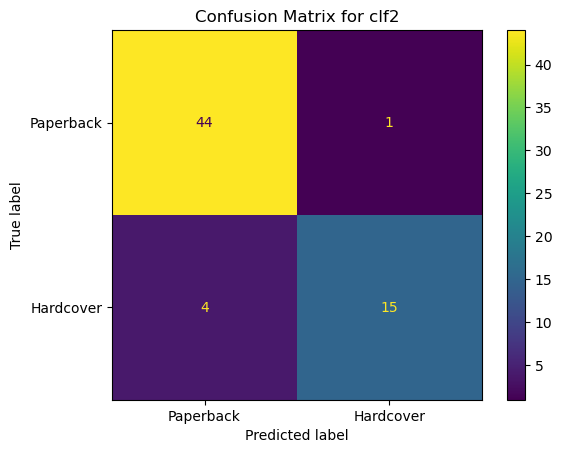

In [83]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_disp = ConfusionMatrixDisplay(
    confusion_matrix(y_test1, y_pred2, 
    labels=[False, True]), display_labels=['Paperback', 'Hardcover'])
_ = cm_disp.plot()
plt.title("Confusion Matrix for clf2")
plt.show()

In [92]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
# in sklearn specificity is recall_score(y_true, y_pred, pos_label=0)
# while sensitivity recall_score(y_true, y_pred, pos_label=1) is the default 

# Sensitivity
sensitivity_test = recall_score(y_test1, y_pred2, pos_label=1)  # For 'Hardcover' class (1)
sensitivity_train = recall_score(y_train1, clf2.predict(X_train1), pos_label=1)

# Specificity
specificity_test = recall_score(y_test1, y_pred2, pos_label=0)  # For 'Paperback' class (0)
specificity_train = recall_score(y_train1, clf2.predict(X_train1), pos_label=0)

# Accuracy
accuracy_test = accuracy_score(y_test1, y_pred2)
accuracy_train = accuracy_score(y_train1, clf2.predict(X_train1))

print("FOR clf2:")
print("In sample (training) sensitivity:", np.round(sensitivity_train, 3))
print("Out of sample (testing) sensitivity:", np.round(sensitivity_test, 3))
print("In sample (training) specificity:", np.round(specificity_train, 3))
print("Out of sample (testing) specificity:", np.round(specificity_test, 3))
print("In sample (training) accuracy:", np.round(accuracy_train, 3))
print("Out of sample (testing) accuracy:", np.round(accuracy_test, 3))

FOR clf2:
In sample (training) sensitivity: 0.687
Out of sample (testing) sensitivity: 0.789
In sample (training) specificity: 0.979
Out of sample (testing) specificity: 0.978
In sample (training) accuracy: 0.902
Out of sample (testing) accuracy: 0.922


## 7. Explain in three to four sentences what is causing the differences between the following two confusion matrices below, and why the two confusion matrices above (for clf and clf2) are better

- The difference is the true outcome values that we are using. In our original matrices, we are using testing data which shows us how our model will perform when predicting newer data.
- If we use ab_reduced_noNaN_train.your_actual_outcome_variable, then we are referencing our actual true values that we have trained on. Since our predictions are based on the true values, then this confusion matrix would be misleading since we have already seen this data which wouldn't show how well our model performs on new data, only ones we've seen.

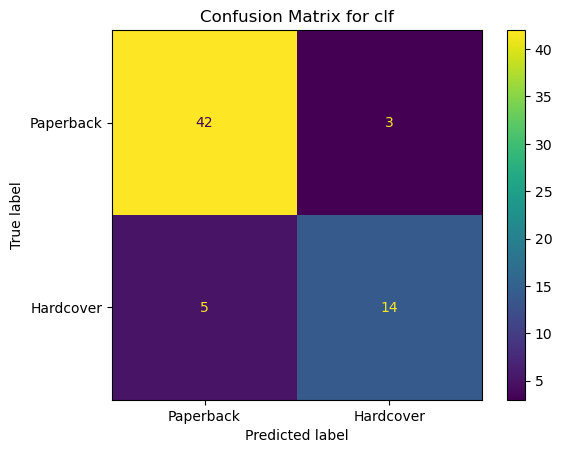

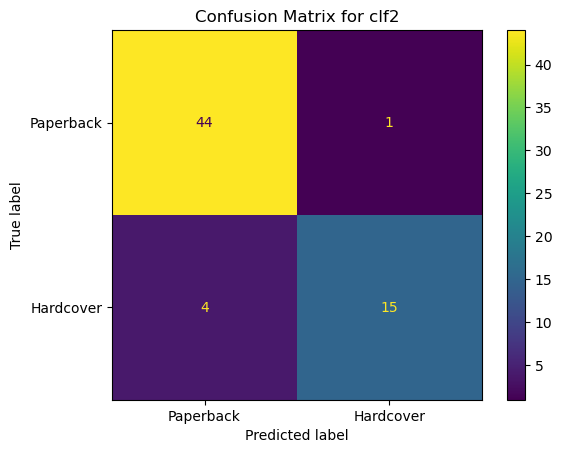

In [117]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_disp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred, 
    labels=[False, True]), display_labels=['Paperback', 'Hardcover'])
_ = cm_disp.plot()
plt.title("Confusion Matrix for clf")
plt.show()

cm_disp = ConfusionMatrixDisplay(
    confusion_matrix(y_test1, y_pred2, 
    labels=[False, True]), display_labels=['Paperback', 'Hardcover'])
_ = cm_disp.plot()
plt.title("Confusion Matrix for clf2")
plt.show()

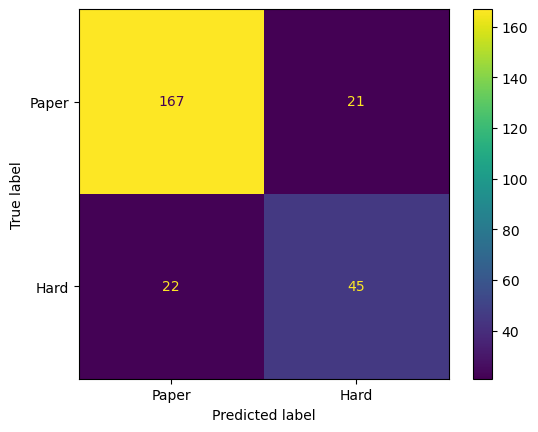

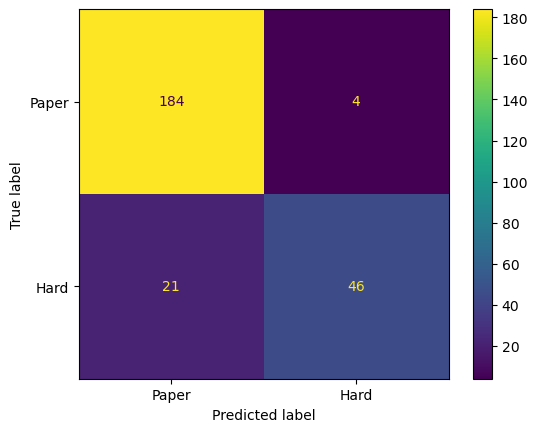

In [115]:
ConfusionMatrixDisplay(
    confusion_matrix(y_train, 
                     clf.predict(train_data[['List Price']]), 
                     labels=[0, 1]), 
    display_labels=["Paper", "Hard"]
).plot()


ConfusionMatrixDisplay(
    confusion_matrix(y_train1, 
                     clf2.predict(train_data[['NumPages', 'Thick', 'List Price']]), 
                     labels=[0, 1]), 
    display_labels=["Paper", "Hard"]
).plot()

## 8. Read the paragraphs in Further Guidance and ask a ChatBot how to visualize feature Importances available for scikit-learn classification decision trees; do so for clf2; and use .feature_names_in_ corresponding to .feature_importances_ to report which predictor variable is most important for making predictions according to clf2
##### GPT: https://chatgpt.com/share/673e8716-68d0-8008-a86c-69b38d48cc5a

It is clear that list price is most important, then thickness, lastly the number of pages.


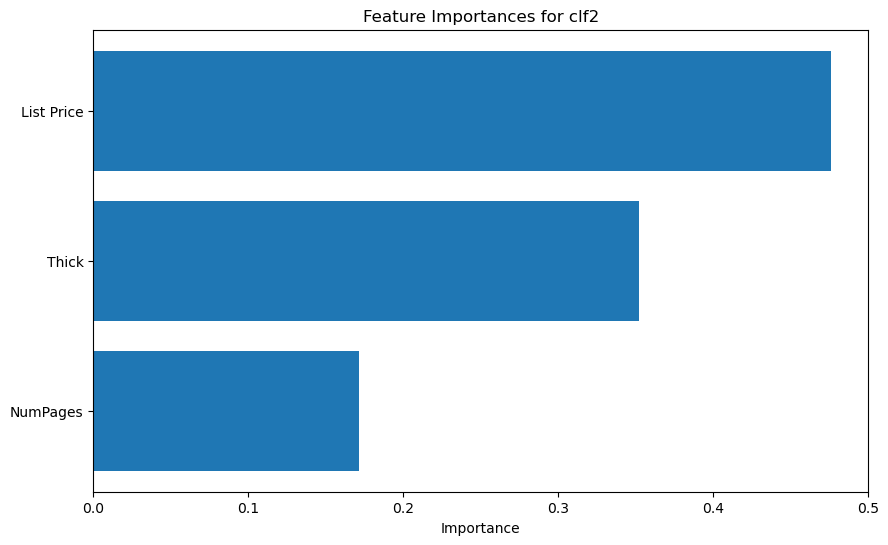

In [121]:
import matplotlib.pyplot as plt

importances = clf2.feature_importances_

feature_names = clf2.feature_names_in_

# Sort the feature importances in descending order
indices = importances.argsort()

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names[indices], importances[indices], align='center')
plt.xlabel('Importance')
plt.title('Feature Importances for clf2')
plt.show()

## 9. Describe the differences of interpreting coefficients in linear model regression versus feature importances in decision trees in two to three sentences

For coefficients in a linear model, we simply just take the value from the equation where the intercept coefficient is the base value and the slope coefficient is the change in dependent variable for a one unit increase in the independent variable. Feature importances is basically the features' relative contribution of the predictor variable in predicting the outcome; it indicates how important each feature is for making accurate splits in the tree.